In [1]:
from fastai.vision.all import *
from fastai.text.all import *
from fastai.collab import *
from fastai.tabular.all import *

In [2]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

In [3]:
learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,4.052777,2.747366,00:01


epoch,train_loss,valid_loss,time
0,2.032666,1.622368,00:01
1,1.662031,1.275315,00:01
2,1.491750,1.119772,00:01
3,1.362030,0.951054,00:01
4,1.231460,0.877522,00:01
5,1.114146,0.786722,00:01
6,1.015588,0.736517,00:01
7,0.939772,0.734216,00:01


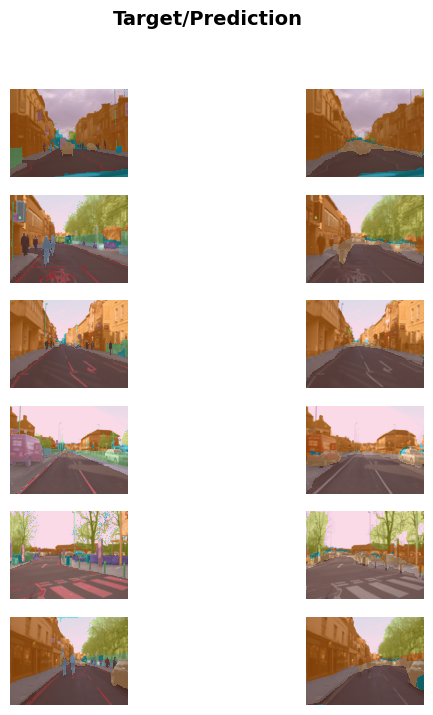

In [4]:
learn.show_results(max_n=6, figsize=(7,8))

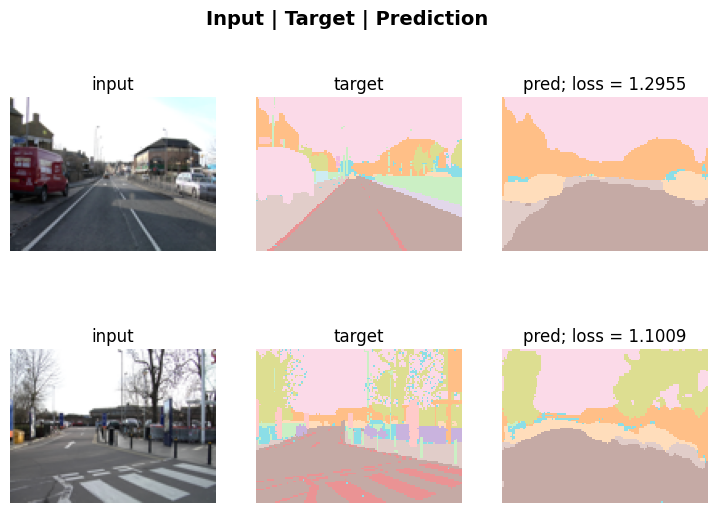

In [5]:
interp = SegmentationInterpretation.from_learner(learn)
interp.plot_top_losses(k=2)